In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv
Saving sign_mnist_test.csv to sign_mnist_test.csv


In [ ]:
def get_data(filename):
    """The function return 2 np.array types: labels and images"""
    labels = []
    images = []
    with open(filename) as training_file:
        read=csv.reader(training_file,delimiter=',')
        first_line = True
        tmp_images = []
        tmp_labels = []
        for row in read:
            if first_line:
                first_line = False
            else:
                tmp_labels.append(row[0])
                images_data = row[1:]
                as_array = np.array_split(images_data,28)
                tmp_images.append(as_array)
        images = np.array(tmp_images).astype('float')
        labels = np.array(tmp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


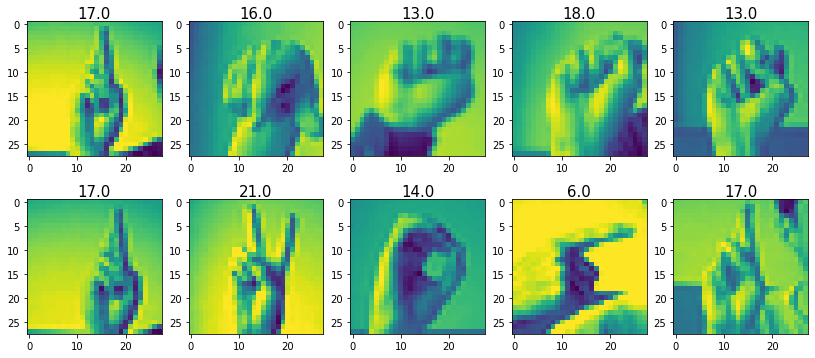

In [ ]:
# Look at ten random images from our dataset
import random

plt.figure(figsize=(14,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    idx = random.randint(0, 27455)
    plt.imshow(training_images[idx])
    plt.title(training_labels[idx], size=15, pad=1)

In [ ]:
# add another dimension to the data
training_images = np.expand_dims(training_images, 3)   #training_images[:, :, :, np.newaxis]
testing_images = np.expand_dims(testing_images, 3)   #testing_images[:, :, :, np.newaxis]   

# Create an ImageDataGenerator with image augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    height_shift_range=0.2
)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Check dimentions
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define a vary simple model
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(26,activation='softmax')
])
train_generator=train_datagen.flow(
    training_images,
    training_labels,
    batch_size=32
)
validation_generator=validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=32
) 
# Compile the model 
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)
# Train the model
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
)
#evaluate it
model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
858/858 [==============================] - 70s 81ms/step - loss: 2.6821 - accuracy: 0.1988 - val_loss: 0.7886 - val_accuracy: 0.7312
Epoch 2/10
858/858 [==============================] - 69s 81ms/step - loss: 1.0470 - accuracy: 0.6571 - val_loss: 0.4746 - val_accuracy: 0.8274
Epoch 3/10
858/858 [==============================] - 69s 80ms/step - loss: 0.6481 - accuracy: 0.7878 - val_loss: 0.2244 - val_accuracy: 0.9300
Epoch 4/10
858/858 [==============================] - 69s 80ms/step - loss: 0.4676 - accuracy: 0.8481 - val_loss: 0.1330 - val_accuracy: 0.9685
Epoch 5/10
858/858 [==============================] - 69s 80ms/step - loss: 0.3415 - accuracy: 0.8901 - val_loss: 0.1072 - val_accuracy: 0.9631
Epoch 6/10
858/858 [==============================] - 69s 80ms/step - loss: 0.2805 - accuracy: 0.9083 - val_loss: 0.0802 - val_accuracy: 0.9784
Epoch 7/10
858/858 [==============================] - 68s 80ms/step - loss: 0.2235 - accuracy: 0.9284 - val_loss: 0.0690 - val_accuracy:

[18.331233978271484, 0.945343017578125]

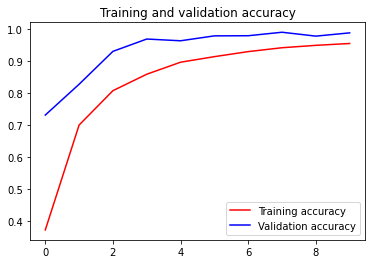

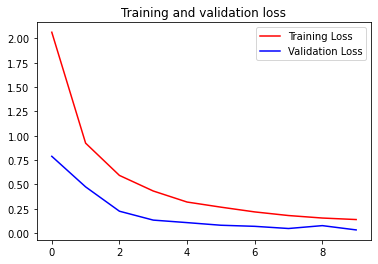

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()